In [3]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import math
import seaborn as sns

## Datayı yükle

In [4]:
data = pd.read_csv('HousingPrices-Amsterdam-August-2021.csv', delimiter=',',index_col=0)

In [5]:
# shape of the Dataframe
shape = data.shape
print(f'The Dataset has {data.shape[0]} rows and {data.shape[1]} columns') 

The Dataset has 924 rows and 7 columns


In [6]:
data.head()

,Address,Zip,Price,Area,Room,Lon,Lat
1,"Blasiusstraat 8 2, Amsterdam",1091 CR,685000.0,64,3,4.907736,52.356157
2,"Kromme Leimuidenstraat 13 H, Amsterdam",1059 EL,475000.0,60,3,4.850476,52.348586
3,"Zaaiersweg 11 A, Amsterdam",1097 SM,850000.0,109,4,4.944774,52.343782
4,"Tenerifestraat 40, Amsterdam",1060 TH,580000.0,128,6,4.789928,52.343712
5,"Winterjanpad 21, Amsterdam",1036 KN,720000.0,138,5,4.902503,52.410538


In [7]:
missing_values = data.isnull().sum().sum()
print('There are %s missing values in the Dataframe!' %(missing_values))
print()

There are 4 missing values in the Dataframe!



## Kayıp veri hangi sütunların elemanlarında

In [8]:
cols = data.columns
print(cols)

Index(['Address', 'Zip', 'Price', 'Area', 'Room', 'Lon', 'Lat'], dtype='object')


In [9]:
for col in cols:
    temp = data[col].isnull().values.sum()
    print(f'Column {col} has {temp} missing values')

Column Address has 0 missing values
Column Zip has 0 missing values
Column Price has 4 missing values
Column Area has 0 missing values
Column Room has 0 missing values
Column Lon has 0 missing values
Column Lat has 0 missing values


In [10]:
data.isnull().sum()  # eksik veri var mı diye kontrol edelim

Address    0
Zip        0
Price      4
Area       0
Room       0
Lon        0
Lat        0
dtype: int64

In [11]:
data.dropna() #eksik verileri gecice olarak kaldıralım

,Address,Zip,Price,Area,Room,Lon,Lat
1,"Blasiusstraat 8 2, Amsterdam",1091 CR,685000.0,64,3,4.907736,52.356157
2,"Kromme Leimuidenstraat 13 H, Amsterdam",1059 EL,475000.0,60,3,4.850476,52.348586
3,"Zaaiersweg 11 A, Amsterdam",1097 SM,850000.0,109,4,4.944774,52.343782
4,"Tenerifestraat 40, Amsterdam",1060 TH,580000.0,128,6,4.789928,52.343712
5,"Winterjanpad 21, Amsterdam",1036 KN,720000.0,138,5,4.902503,52.410538
...,...,...,...,...,...,...,...
920,"Ringdijk, Amsterdam",1097 AE,750000.0,117,1,4.927757,52.354173
921,"Kleine Beerstraat 31, Amsterdam",1033 CP,350000.0,72,3,4.890612,52.414587
922,"Stuyvesantstraat 33 II, Amsterdam",1058 AK,350000.0,51,3,4.856935,52.363256
923,"John Blankensteinstraat 51, Amsterdam",1095 MB,599000.0,113,4,4.965731,52.375268


In [12]:
# add a new column 'PriceQm' which represents the price per squaremeter and round for two decimals
data['PriceM2'] = data.Price / data.Area
data['PriceM2'] = data['PriceM2'].round(2)

In [13]:
data

,Address,Zip,Price,Area,Room,Lon,Lat,PriceM2
1,"Blasiusstraat 8 2, Amsterdam",1091 CR,685000.0,64,3,4.907736,52.356157,10703.12
2,"Kromme Leimuidenstraat 13 H, Amsterdam",1059 EL,475000.0,60,3,4.850476,52.348586,7916.67
3,"Zaaiersweg 11 A, Amsterdam",1097 SM,850000.0,109,4,4.944774,52.343782,7798.17
4,"Tenerifestraat 40, Amsterdam",1060 TH,580000.0,128,6,4.789928,52.343712,4531.25
5,"Winterjanpad 21, Amsterdam",1036 KN,720000.0,138,5,4.902503,52.410538,5217.39
...,...,...,...,...,...,...,...,...
920,"Ringdijk, Amsterdam",1097 AE,750000.0,117,1,4.927757,52.354173,6410.26
921,"Kleine Beerstraat 31, Amsterdam",1033 CP,350000.0,72,3,4.890612,52.414587,4861.11
922,"Stuyvesantstraat 33 II, Amsterdam",1058 AK,350000.0,51,3,4.856935,52.363256,6862.75
923,"John Blankensteinstraat 51, Amsterdam",1095 MB,599000.0,113,4,4.965731,52.375268,5300.88


<AxesSubplot: xlabel='Room'>

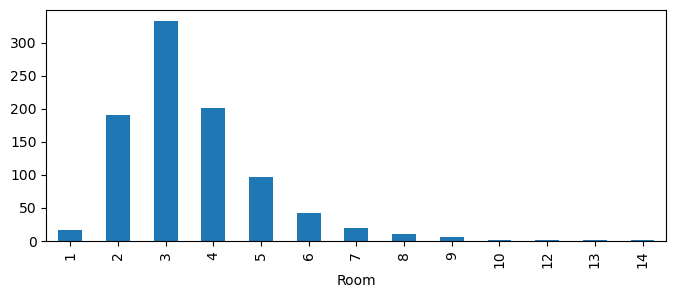

In [14]:
# visualize the distribution how many houses have how many rooms 
plt.figure(figsize=(8,3))
houses_rooms = data.groupby('Room').size()
houses_rooms.plot.bar()

<AxesSubplot: >

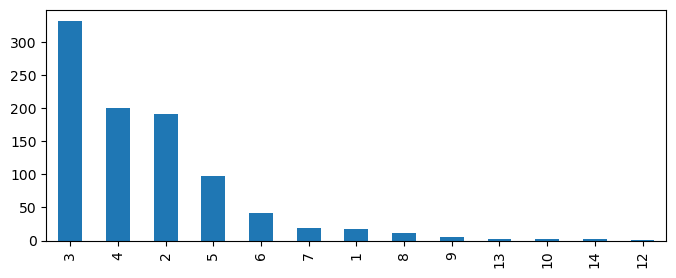

In [15]:
plt.figure(figsize=(8,3))
data.Room.value_counts().plot.bar()

In [16]:
data[data.Room > 10]

,Address,Zip,Price,Area,Room,Lon,Lat,PriceM2
104,"Westeinde 16, Amsterdam",1017 ZP,4550000.0,497,13,4.898620,52.358798,9154.93
306,"Singel 318, Amsterdam",1016 AE,4900000.0,623,13,4.887869,52.371039,7865.17
309,"Broekergouw 4, Amsterdam",1027 AH,1695000.0,467,14,4.970830,52.412038,3629.55
322,"Haarlemmerweg 705, Amsterdam",1067 HP,NaN,366,12,4.787874,52.383877,NaN
838,"Oranje Nassaulaan 9, Amsterdam",1075 AH,5850000.0,480,14,4.863729,52.354874,12187.50


## Temizle

In [17]:
veri_saglikli = data.dropna()

In [18]:
data['ZipNo'] = veri_saglikli['Zip'].apply(lambda x: int(x.split(' ')[0]))
data['AreaCode'] = veri_saglikli['Zip'].apply(lambda x: str(x.split(' ')[1]))
data.head()

,Address,Zip,Price,Area,Room,Lon,Lat,PriceM2,ZipNo,AreaCode
1,"Blasiusstraat 8 2, Amsterdam",1091 CR,685000.0,64,3,4.907736,52.356157,10703.12,1091.0,CR
2,"Kromme Leimuidenstraat 13 H, Amsterdam",1059 EL,475000.0,60,3,4.850476,52.348586,7916.67,1059.0,EL
3,"Zaaiersweg 11 A, Amsterdam",1097 SM,850000.0,109,4,4.944774,52.343782,7798.17,1097.0,SM
4,"Tenerifestraat 40, Amsterdam",1060 TH,580000.0,128,6,4.789928,52.343712,4531.25,1060.0,TH
5,"Winterjanpad 21, Amsterdam",1036 KN,720000.0,138,5,4.902503,52.410538,5217.39,1036.0,KN


In [19]:
veri = veri_saglikli.drop(['Address', 'Zip'], axis=1)

In [20]:
veri.head()

,Price,Area,Room,Lon,Lat,PriceM2
1,685000.0,64,3,4.907736,52.356157,10703.12
2,475000.0,60,3,4.850476,52.348586,7916.67
3,850000.0,109,4,4.944774,52.343782,7798.17
4,580000.0,128,6,4.789928,52.343712,4531.25
5,720000.0,138,5,4.902503,52.410538,5217.39


In [21]:
veri.describe()

,Price,Area,Room,Lon,Lat,PriceM2
count,9.200000e+02,920.000000,920.00000,920.000000,920.000000,920.000000
mean,6.220654e+05,95.607609,3.56413,4.888652,52.363271,6479.852348
std,5.389942e+05,56.849699,1.57103,0.053118,0.024054,2219.265329
min,1.750000e+05,21.000000,1.00000,4.644819,52.291519,2430.560000
25%,3.500000e+05,60.000000,3.00000,4.855834,52.351925,4649.085000
50%,4.670000e+05,83.000000,3.00000,4.886818,52.364499,6578.950000
75%,7.000000e+05,113.000000,4.00000,4.922337,52.377545,7768.915000
max,5.950000e+06,623.000000,14.00000,5.029122,52.423805,25252.810000


<AxesSubplot: xlabel='Price'>

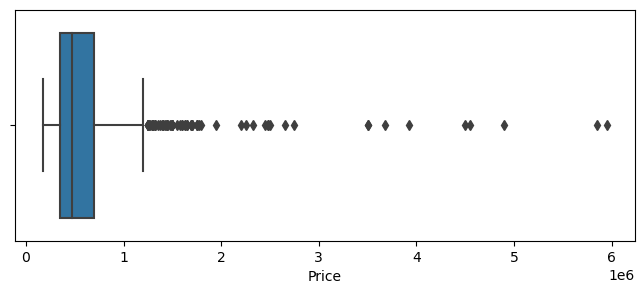

In [22]:
plt.figure(figsize=(8,3))
sns.boxplot(data=veri, x=veri['Price'])

## Outlierları Çıkar

In [23]:
q1 = veri.describe()['Price']['25%']

In [24]:
q3 = veri.describe()['Price']['75%']

In [25]:
fark = q3 -q1
max_ucret = q3 + 1.5*fark

In [26]:
outlier        = veri[veri['Price']>=max_ucret]
outlier_sayisi = outlier['Price'].count()
veri_sayisi    = veri['Price'].count()
print('Outlier veri yuzdesi: ' + str(round(outlier_sayisi/veri_sayisi * 100, 2)) + '%')

Outlier veri yuzdesi: 7.72%


In [27]:
temiz_veri = veri[veri['Price'] <= max_ucret]

<AxesSubplot: xlabel='Price'>

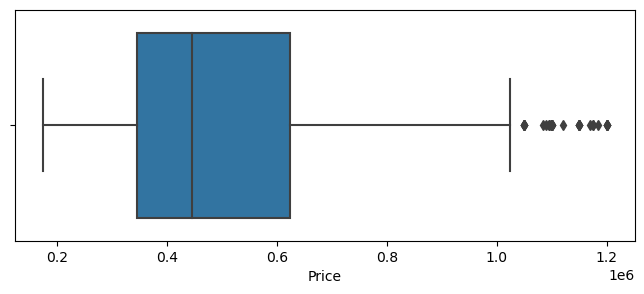

In [28]:
plt.figure(figsize=(8,3))
sns.boxplot(data=temiz_veri, x=temiz_veri['Price'])

<AxesSubplot: >

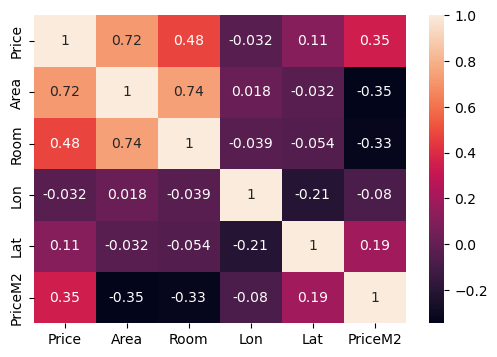

In [29]:
plt.figure(figsize=(6,4))
sns.heatmap(temiz_veri.corr(), annot = True)

## Model Yapımı

In [30]:
y = temiz_veri['Price']
X = temiz_veri.drop(['Price', 'PriceM2'], axis = 1)

X.head()

,Area,Room,Lon,Lat
1,64,3,4.907736,52.356157
2,60,3,4.850476,52.348586
3,109,4,4.944774,52.343782
4,128,6,4.789928,52.343712
5,138,5,4.902503,52.410538


In [31]:
# Labelencoding
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# var_mod = ['Street_Name','AreaCode']
# for i in var_mod:
#     X[i] = le.fit_transform(X[i])
# X.head()

In [32]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression

In [33]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=1)

In [34]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [35]:
pred= model.predict(X_test)

In [36]:
model.score(X_train, y_train)

0.5414965007759789

In [37]:
model.score(X_test, y_test)

0.5200363549468714

In [38]:
y_test_np = np.array(y_test)

In [39]:
u = ((y_test_np - pred)**2).sum()

In [40]:
v = ((y_test_np - y_test_np.mean())**2).sum()

In [41]:
1 - u/v

0.5200363549468714

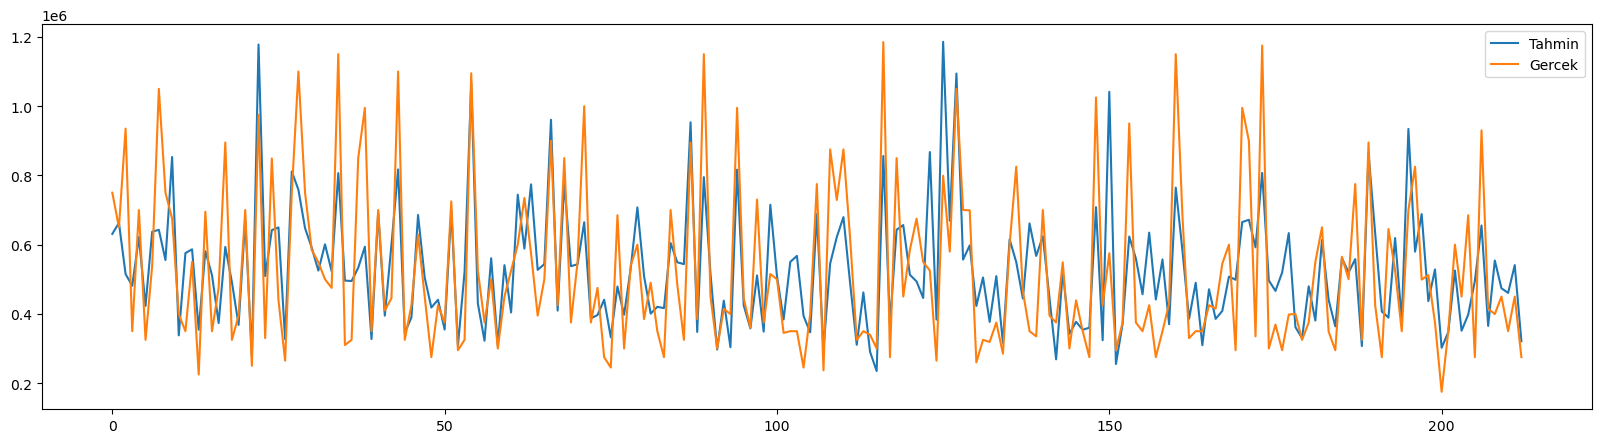

In [42]:
plt.figure(figsize=(20,5))
plt.plot(pred[:], label='Tahmin')
plt.plot(y_test_np[:], label='Gercek')
plt.legend()

In [43]:
## devam mdoelimizi eğitelim 

In [44]:
from sklearn.linear_model import LinearRegression, LogisticRegression, Lasso, Ridge, BayesianRidge, RANSACRegressor

In [45]:
y = temiz_veri['Price']
x = temiz_veri.drop(['Price', 'PriceM2'], axis = 1)

In [46]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=1)

In [47]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [48]:
pred= model.predict(x_test)

In [49]:
y_test_np = np.array(y_test)

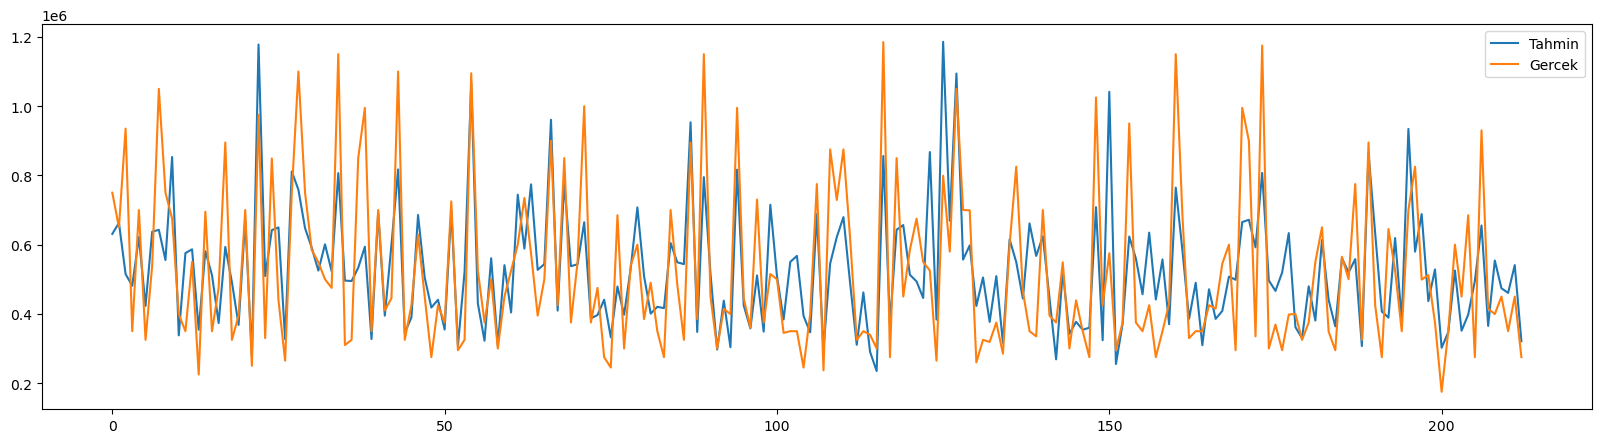

In [50]:
plt.figure(figsize=(20,5))
plt.plot(pred[:], label='Tahmin')
plt.plot(y_test_np[:], label='Gercek')
plt.legend()

In [56]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor

In [57]:
model = RandomForestRegressor()
# model = RandomForestRegressor(n_estimators=56, max_depth=4, bootstrap=True, max_features='auto', min_samples_leaf=1, min_samples_split=2)

In [58]:
model.fit(x_train, y_train)

RandomForestRegressor()

In [59]:
pred = model.predict(x_test)

In [60]:
y_test_np = np.array(y_test)

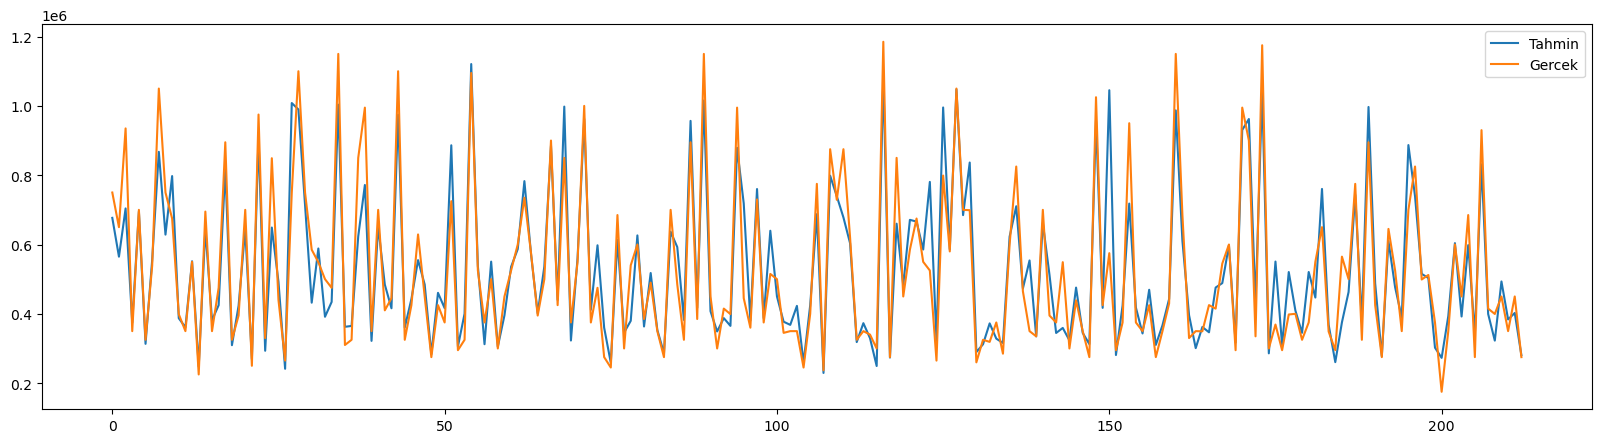

In [61]:
plt.figure(figsize=(20,5))
plt.plot(pred[:], label='Tahmin')
plt.plot(y_test_np[:], label='Gercek')
plt.legend()

In [62]:
mae_rf = np.mean(np.abs(y_test_np - pred))

In [63]:
mae_rf

63192.24985915492

# ---------------------------- Deep Learning Model ----------------------------

In [64]:
import tensorflow as tf
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Input, LeakyReLU, Flatten, Dense, Dropout
from tensorflow.keras.initializers import RandomNormal
from tensorflow.keras.models import load_model, Model
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

In [65]:
y = temiz_veri['Price']
x = temiz_veri.drop(['Price', 'PriceM2'], axis = 1)

In [66]:
x_train, x_diger, y_train, y_diger = train_test_split(x, y, test_size=0.3, random_state=1)

In [67]:
x_val = x_diger[:125]
y_val = y_diger[:125]

C:\Users\muham\AppData\Local\Temp\ipykernel_7648\2689136256.py:2: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  y_val = y_diger[:125]


In [68]:
x_test = x_diger[125:]
y_test = y_diger[125:]

C:\Users\muham\AppData\Local\Temp\ipykernel_7648\292593234.py:2: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  y_test = y_diger[125:]


In [70]:
val_loss = []
train_loss = []

In [71]:
K.clear_session()

input_ = Input(batch_shape= (None, 4))

init = RandomNormal(mean=0, stddev=0.05)

out = Flatten()(input_)

out = Dense(50, kernel_initializer=init)(out) # , activation='relu'
out = LeakyReLU(alpha=0.1)(out)
out = Dense(50, kernel_initializer=init)(out)
out = LeakyReLU(alpha=0.1)(out)

out = Dense(1, activation='linear')(out)

model_dl = Model(inputs=input_, outputs=out)
model_dl.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 4)]               0         
                                                                 
 flatten (Flatten)           (None, 4)                 0         
                                                                 
 dense (Dense)               (None, 50)                250       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 50)                0         
                                                                 
 dense_1 (Dense)             (None, 50)                2550      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 50)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 51    

C:\Users\muham\anaconda3\envs\tensorflow\lib\site-packages\keras\initializers\initializers_v2.py:120: UserWarning: The initializer RandomNormal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


In [72]:
checkpoint = ModelCheckpoint('regresyon_dl.h5', 
                             monitor='val_loss', 
                             verbose=1, 
                             save_best_only=True, 
                             save_weights_only=False)

In [73]:
model_dl.compile(optimizer=tf.keras.optimizers.Adam(lr = 0.001), loss='mae')

C:\Users\muham\anaconda3\envs\tensorflow\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [ ]:
history = model_dl.fit(np.array(x_train),
                      np.array(y_train),
                      epochs=10000,
                      batch_size=50,
                      steps_per_epoch=10,
                      callbacks=[checkpoint],
                      validation_data= (np.array(x_val), np.array(y_val)),
                      validation_steps=2)

Epoch 1/10000
 1/10 [==>...........................] - ETA: 6s - loss: 555646.3750
Epoch 1: val_loss improved from inf to 553769.68750, saving model to regresyon_dl.h5
10/10 [==============================] - 1s 55ms/step - loss: 508076.5625 - val_loss: 553769.6875
Epoch 2/10000
 1/10 [==>...........................] - ETA: 0s - loss: 462870.6250
Epoch 2: val_loss improved from 553769.68750 to 553754.75000, saving model to regresyon_dl.h5
10/10 [==============================] - 0s 18ms/step - loss: 507495.5938 - val_loss: 553754.7500
Epoch 3/10000
 1/10 [==>...........................] - ETA: 0s - loss: 505835.8125
Epoch 3: val_loss improved from 553754.75000 to 553728.25000, saving model to regresyon_dl.h5
10/10 [==============================] - 0s 18ms/step - loss: 502389.9688 - val_loss: 553728.2500
Epoch 4/10000
 1/10 [==>...........................] - ETA: 0s - loss: 491192.4375
Epoch 4: val_loss improved from 553728.25000 to 553685.12500, saving model to regresyon_dl.h5
10/10 [

Epoch 31/10000
 1/10 [==>...........................] - ETA: 0s - loss: 429863.9062
Epoch 31: val_loss improved from 522119.28125 to 518708.09375, saving model to regresyon_dl.h5
10/10 [==============================] - 0s 17ms/step - loss: 475102.3750 - val_loss: 518708.0938
Epoch 32/10000
 1/10 [==>...........................] - ETA: 0s - loss: 481543.1250
Epoch 32: val_loss improved from 518708.09375 to 515090.18750, saving model to regresyon_dl.h5
10/10 [==============================] - 0s 18ms/step - loss: 460602.0938 - val_loss: 515090.1875
Epoch 33/10000
 1/10 [==>...........................] - ETA: 0s - loss: 531787.8125
Epoch 33: val_loss improved from 515090.18750 to 511210.84375, saving model to regresyon_dl.h5
10/10 [==============================] - 0s 18ms/step - loss: 475711.1875 - val_loss: 511210.8438
Epoch 34/10000
 1/10 [==>...........................] - ETA: 0s - loss: 405822.3125
Epoch 34: val_loss improved from 511210.84375 to 507091.37500, saving model to regres

10/10 [==============================] - 0s 17ms/step - loss: 258837.0000 - val_loss: 291112.0000
Epoch 61/10000
 1/10 [==>...........................] - ETA: 0s - loss: 275032.3438
Epoch 61: val_loss improved from 291112.00000 to 277897.93750, saving model to regresyon_dl.h5
10/10 [==============================] - 0s 17ms/step - loss: 255431.5469 - val_loss: 277897.9375
Epoch 62/10000
 1/10 [==>...........................] - ETA: 0s - loss: 242969.5156
Epoch 62: val_loss improved from 277897.93750 to 264694.09375, saving model to regresyon_dl.h5
10/10 [==============================] - 0s 17ms/step - loss: 239972.0469 - val_loss: 264694.0938
Epoch 63/10000
 1/10 [==>...........................] - ETA: 0s - loss: 230317.4375
Epoch 63: val_loss improved from 264694.09375 to 252062.64062, saving model to regresyon_dl.h5
10/10 [==============================] - 0s 17ms/step - loss: 218071.2812 - val_loss: 252062.6406
Epoch 64/10000
 1/10 [==>...........................] - ETA: 0s - loss:

 1/10 [==>...........................] - ETA: 0s - loss: 109790.0469
Epoch 90: val_loss improved from 123781.21875 to 123621.52344, saving model to regresyon_dl.h5
10/10 [==============================] - 0s 19ms/step - loss: 124437.2344 - val_loss: 123621.5234
Epoch 91/10000
 1/10 [==>...........................] - ETA: 0s - loss: 121087.9219
Epoch 91: val_loss improved from 123621.52344 to 123500.40625, saving model to regresyon_dl.h5
10/10 [==============================] - 0s 19ms/step - loss: 122089.6250 - val_loss: 123500.4062
Epoch 92/10000
 1/10 [==>...........................] - ETA: 0s - loss: 111975.1719
Epoch 92: val_loss improved from 123500.40625 to 123404.43750, saving model to regresyon_dl.h5
10/10 [==============================] - 0s 17ms/step - loss: 120084.4766 - val_loss: 123404.4375
Epoch 93/10000
 1/10 [==>...........................] - ETA: 0s - loss: 110619.5703
Epoch 93: val_loss improved from 123404.43750 to 123329.97656, saving model to regresyon_dl.h5
10/10

Epoch 120/10000
 1/10 [==>...........................] - ETA: 0s - loss: 101107.5625
Epoch 120: val_loss improved from 122690.03906 to 122679.54688, saving model to regresyon_dl.h5
10/10 [==============================] - 0s 18ms/step - loss: 120217.6797 - val_loss: 122679.5469
Epoch 121/10000
 1/10 [==>...........................] - ETA: 0s - loss: 119441.1016
Epoch 121: val_loss improved from 122679.54688 to 122664.18750, saving model to regresyon_dl.h5
10/10 [==============================] - 0s 15ms/step - loss: 121328.9375 - val_loss: 122664.1875
Epoch 122/10000
 1/10 [==>...........................] - ETA: 0s - loss: 111579.1719
Epoch 122: val_loss improved from 122664.18750 to 122650.32031, saving model to regresyon_dl.h5
10/10 [==============================] - 0s 15ms/step - loss: 117678.3438 - val_loss: 122650.3203
Epoch 123/10000
 1/10 [==>...........................] - ETA: 0s - loss: 112793.6484
Epoch 123: val_loss improved from 122650.32031 to 122639.10156, saving model t

10/10 [==============================] - 0s 17ms/step - loss: 122173.3984 - val_loss: 122238.5391
Epoch 150/10000
 1/10 [==>...........................] - ETA: 0s - loss: 126203.7422
Epoch 150: val_loss improved from 122238.53906 to 122223.03906, saving model to regresyon_dl.h5
10/10 [==============================] - 0s 18ms/step - loss: 119731.7734 - val_loss: 122223.0391
Epoch 151/10000
 1/10 [==>...........................] - ETA: 0s - loss: 115337.0781
Epoch 151: val_loss improved from 122223.03906 to 122210.27344, saving model to regresyon_dl.h5
10/10 [==============================] - 0s 19ms/step - loss: 119949.4219 - val_loss: 122210.2734
Epoch 152/10000
 1/10 [==>...........................] - ETA: 0s - loss: 105471.1875
Epoch 152: val_loss improved from 122210.27344 to 122209.06250, saving model to regresyon_dl.h5
10/10 [==============================] - 0s 20ms/step - loss: 119981.4375 - val_loss: 122209.0625
Epoch 153/10000
 1/10 [==>...........................] - ETA: 0s 

 1/10 [==>...........................] - ETA: 0s - loss: 117069.3906
Epoch 179: val_loss improved from 121803.17969 to 121779.95312, saving model to regresyon_dl.h5
10/10 [==============================] - 0s 21ms/step - loss: 118990.2500 - val_loss: 121779.9531
Epoch 180/10000
 1/10 [==>...........................] - ETA: 0s - loss: 93163.5625
Epoch 180: val_loss improved from 121779.95312 to 121766.06250, saving model to regresyon_dl.h5
10/10 [==============================] - 0s 14ms/step - loss: 119331.8281 - val_loss: 121766.0625
Epoch 181/10000
 1/10 [==>...........................] - ETA: 0s - loss: 93811.0312
Epoch 181: val_loss improved from 121766.06250 to 121745.77344, saving model to regresyon_dl.h5
10/10 [==============================] - 0s 15ms/step - loss: 118509.1328 - val_loss: 121745.7734
Epoch 182/10000
 1/10 [==>...........................] - ETA: 0s - loss: 133163.1094
Epoch 182: val_loss improved from 121745.77344 to 121735.28906, saving model to regresyon_dl.h5


Epoch 209/10000
 1/10 [==>...........................] - ETA: 0s - loss: 120279.0625
Epoch 209: val_loss improved from 121357.50000 to 121347.84375, saving model to regresyon_dl.h5
10/10 [==============================] - 0s 14ms/step - loss: 117307.8359 - val_loss: 121347.8438
Epoch 210/10000
 1/10 [==>...........................] - ETA: 0s - loss: 113395.8203
Epoch 210: val_loss did not improve from 121347.84375
10/10 [==============================] - 0s 8ms/step - loss: 120744.8516 - val_loss: 121348.5469
Epoch 211/10000
 1/10 [==>...........................] - ETA: 0s - loss: 102204.6328
Epoch 211: val_loss improved from 121347.84375 to 121329.88281, saving model to regresyon_dl.h5
10/10 [==============================] - 0s 14ms/step - loss: 121976.0859 - val_loss: 121329.8828
Epoch 212/10000
 1/10 [==>...........................] - ETA: 0s - loss: 104972.7578
Epoch 212: val_loss did not improve from 121329.88281
10/10 [==============================] - 0s 8ms/step - loss: 114918

10/10 [==============================] - 0s 16ms/step - loss: 116687.6406 - val_loss: 120982.5938
Epoch 240/10000
 1/10 [==>...........................] - ETA: 0s - loss: 95816.5312
Epoch 240: val_loss improved from 120982.59375 to 120939.21875, saving model to regresyon_dl.h5
10/10 [==============================] - 0s 15ms/step - loss: 121594.0703 - val_loss: 120939.2188
Epoch 241/10000
 1/10 [==>...........................] - ETA: 0s - loss: 121057.4297
Epoch 241: val_loss did not improve from 120939.21875
10/10 [==============================] - 0s 10ms/step - loss: 121782.7891 - val_loss: 120945.7812
Epoch 242/10000
 1/10 [==>...........................] - ETA: 0s - loss: 106275.4609
Epoch 242: val_loss did not improve from 120939.21875
10/10 [==============================] - 0s 8ms/step - loss: 117185.7734 - val_loss: 120950.7031
Epoch 243/10000
 1/10 [==>...........................] - ETA: 0s - loss: 97876.2500
Epoch 243: val_loss improved from 120939.21875 to 120908.90625, sav

 1/10 [==>...........................] - ETA: 0s - loss: 120995.2500
Epoch 270: val_loss improved from 120652.02344 to 120642.85938, saving model to regresyon_dl.h5
10/10 [==============================] - 0s 15ms/step - loss: 117005.3594 - val_loss: 120642.8594
Epoch 271/10000
 1/10 [==>...........................] - ETA: 0s - loss: 112982.6406
Epoch 271: val_loss improved from 120642.85938 to 120635.29688, saving model to regresyon_dl.h5
10/10 [==============================] - 0s 15ms/step - loss: 119479.4766 - val_loss: 120635.2969
Epoch 272/10000
 1/10 [==>...........................] - ETA: 0s - loss: 129838.6797
Epoch 272: val_loss improved from 120635.29688 to 120624.34375, saving model to regresyon_dl.h5
10/10 [==============================] - 0s 15ms/step - loss: 114716.1172 - val_loss: 120624.3438
Epoch 273/10000
 1/10 [==>...........................] - ETA: 0s - loss: 134667.3438
Epoch 273: val_loss improved from 120624.34375 to 120615.84375, saving model to regresyon_dl.h

10/10 [==============================] - 0s 8ms/step - loss: 119839.7109 - val_loss: 120407.9531
Epoch 300/10000
 1/10 [==>...........................] - ETA: 0s - loss: 114370.0625
Epoch 300: val_loss improved from 120402.14844 to 120393.82812, saving model to regresyon_dl.h5
10/10 [==============================] - 0s 15ms/step - loss: 120631.2266 - val_loss: 120393.8281
Epoch 301/10000
 1/10 [==>...........................] - ETA: 0s - loss: 127995.8438
Epoch 301: val_loss did not improve from 120393.82812
10/10 [==============================] - 0s 8ms/step - loss: 119232.3672 - val_loss: 120401.8281
Epoch 302/10000
 1/10 [==>...........................] - ETA: 0s - loss: 116512.7891
Epoch 302: val_loss improved from 120393.82812 to 120374.46094, saving model to regresyon_dl.h5
10/10 [==============================] - 0s 15ms/step - loss: 123894.9141 - val_loss: 120374.4609
Epoch 303/10000
 1/10 [==>...........................] - ETA: 0s - loss: 88658.2578
Epoch 303: val_loss did n

Epoch 331/10000
 1/10 [==>...........................] - ETA: 0s - loss: 125268.3828
Epoch 331: val_loss did not improve from 120311.85938
10/10 [==============================] - 0s 10ms/step - loss: 117725.2500 - val_loss: 120319.4531
Epoch 332/10000
 1/10 [==>...........................] - ETA: 0s - loss: 127712.8203
Epoch 332: val_loss did not improve from 120311.85938
10/10 [==============================] - 0s 9ms/step - loss: 117352.3984 - val_loss: 120313.1797
Epoch 333/10000
 1/10 [==>...........................] - ETA: 0s - loss: 164665.9375
Epoch 333: val_loss did not improve from 120311.85938
10/10 [==============================] - 0s 8ms/step - loss: 123886.2812 - val_loss: 120341.6328
Epoch 334/10000
 1/10 [==>...........................] - ETA: 0s - loss: 128651.4375
Epoch 334: val_loss did not improve from 120311.85938
10/10 [==============================] - 0s 9ms/step - loss: 120445.2422 - val_loss: 120367.1406
Epoch 335/10000
 1/10 [==>...........................] 

10/10 [==============================] - 0s 9ms/step - loss: 117765.3594 - val_loss: 120425.1016
Epoch 366/10000
 1/10 [==>...........................] - ETA: 0s - loss: 136976.7031
Epoch 366: val_loss did not improve from 120305.03906
10/10 [==============================] - 0s 9ms/step - loss: 119286.4062 - val_loss: 120415.5781
Epoch 367/10000
 1/10 [==>...........................] - ETA: 0s - loss: 132857.1250
Epoch 367: val_loss did not improve from 120305.03906
10/10 [==============================] - 0s 9ms/step - loss: 116784.5781 - val_loss: 120400.3828
Epoch 368/10000
 1/10 [==>...........................] - ETA: 0s - loss: 136588.7969
Epoch 368: val_loss did not improve from 120305.03906
10/10 [==============================] - 0s 9ms/step - loss: 121082.4297 - val_loss: 120440.9531
Epoch 369/10000
 1/10 [==>...........................] - ETA: 0s - loss: 127132.7500
Epoch 369: val_loss did not improve from 120305.03906
10/10 [==============================] - 0s 10ms/step - 

 1/10 [==>...........................] - ETA: 0s - loss: 116007.0781
Epoch 400: val_loss did not improve from 120305.03906
10/10 [==============================] - 0s 11ms/step - loss: 121450.8203 - val_loss: 120467.7031
Epoch 401/10000
 1/10 [==>...........................] - ETA: 0s - loss: 112001.2500
Epoch 401: val_loss did not improve from 120305.03906
10/10 [==============================] - 0s 10ms/step - loss: 117263.2656 - val_loss: 120480.3594
Epoch 402/10000
 1/10 [==>...........................] - ETA: 0s - loss: 124408.7812
Epoch 402: val_loss did not improve from 120305.03906
10/10 [==============================] - 0s 10ms/step - loss: 120750.2578 - val_loss: 120472.7812
Epoch 403/10000
 1/10 [==>...........................] - ETA: 0s - loss: 125516.2812
Epoch 403: val_loss did not improve from 120305.03906
10/10 [==============================] - 0s 9ms/step - loss: 116923.4688 - val_loss: 120417.6875
Epoch 404/10000
 1/10 [==>...........................] - ETA: 0s - lo

Epoch 435/10000
 1/10 [==>...........................] - ETA: 0s - loss: 122803.8828
Epoch 435: val_loss did not improve from 120305.03906
10/10 [==============================] - 0s 9ms/step - loss: 123078.5156 - val_loss: 120448.8984
Epoch 436/10000
 1/10 [==>...........................] - ETA: 0s - loss: 146821.0000
Epoch 436: val_loss did not improve from 120305.03906
10/10 [==============================] - 0s 8ms/step - loss: 113461.7031 - val_loss: 120460.7188
Epoch 437/10000
 1/10 [==>...........................] - ETA: 0s - loss: 108182.6484
Epoch 437: val_loss did not improve from 120305.03906
10/10 [==============================] - 0s 8ms/step - loss: 119521.9688 - val_loss: 120446.0391
Epoch 438/10000
 1/10 [==>...........................] - ETA: 0s - loss: 114732.3984
Epoch 438: val_loss did not improve from 120305.03906
10/10 [==============================] - 0s 8ms/step - loss: 119388.6797 - val_loss: 120450.6016
Epoch 439/10000
 1/10 [==>...........................] -

Epoch 470/10000
 1/10 [==>...........................] - ETA: 0s - loss: 144861.4844
Epoch 470: val_loss did not improve from 120305.03906
10/10 [==============================] - 0s 8ms/step - loss: 121351.9609 - val_loss: 120480.8203
Epoch 471/10000
 1/10 [==>...........................] - ETA: 0s - loss: 116138.3203
Epoch 471: val_loss did not improve from 120305.03906
10/10 [==============================] - 0s 8ms/step - loss: 120673.4062 - val_loss: 120503.3828
Epoch 472/10000
 1/10 [==>...........................] - ETA: 0s - loss: 99347.4219
Epoch 472: val_loss did not improve from 120305.03906
10/10 [==============================] - 0s 9ms/step - loss: 113022.6406 - val_loss: 120470.8828
Epoch 473/10000
 1/10 [==>...........................] - ETA: 0s - loss: 101510.8516
Epoch 473: val_loss did not improve from 120305.03906
10/10 [==============================] - 0s 8ms/step - loss: 120455.6953 - val_loss: 120502.3828
Epoch 474/10000
 1/10 [==>...........................] - 

Epoch 505/10000
 1/10 [==>...........................] - ETA: 0s - loss: 101008.2734
Epoch 505: val_loss did not improve from 120305.03906
10/10 [==============================] - 0s 8ms/step - loss: 119217.7266 - val_loss: 120564.1406
Epoch 506/10000
 1/10 [==>...........................] - ETA: 0s - loss: 139972.2031
Epoch 506: val_loss did not improve from 120305.03906
10/10 [==============================] - 0s 8ms/step - loss: 118937.8984 - val_loss: 120549.1406
Epoch 507/10000
 1/10 [==>...........................] - ETA: 0s - loss: 124023.8984
Epoch 507: val_loss did not improve from 120305.03906
10/10 [==============================] - 0s 8ms/step - loss: 119733.8438 - val_loss: 120534.3828
Epoch 508/10000
 1/10 [==>...........................] - ETA: 0s - loss: 126818.1406
Epoch 508: val_loss did not improve from 120305.03906
10/10 [==============================] - 0s 9ms/step - loss: 120396.3203 - val_loss: 120531.1406
Epoch 509/10000
 1/10 [==>...........................] -

Epoch 540/10000
 1/10 [==>...........................] - ETA: 0s - loss: 120916.2578
Epoch 540: val_loss did not improve from 120305.03906
10/10 [==============================] - 0s 10ms/step - loss: 117376.4844 - val_loss: 120468.8828
Epoch 541/10000
 1/10 [==>...........................] - ETA: 0s - loss: 133701.1406
Epoch 541: val_loss did not improve from 120305.03906
10/10 [==============================] - 0s 10ms/step - loss: 119157.6484 - val_loss: 120521.6797
Epoch 542/10000
 1/10 [==>...........................] - ETA: 0s - loss: 120257.1719
Epoch 542: val_loss did not improve from 120305.03906
10/10 [==============================] - 0s 10ms/step - loss: 120042.4922 - val_loss: 120554.4297
Epoch 543/10000
 1/10 [==>...........................] - ETA: 0s - loss: 112677.0938
Epoch 543: val_loss did not improve from 120305.03906
10/10 [==============================] - 0s 10ms/step - loss: 119251.8359 - val_loss: 120505.2812
Epoch 544/10000
 1/10 [==>..........................

In [ ]:
pred_dl = model_dl.predict(x_test)

In [ ]:
plt.plot(pred_dl)
plt.plot(np.array(y_test))

In [ ]:
mae_dl = np.mean(np.abs(pred_dl - np.array(y_test)))

In [ ]:
mae_dl

# ------------------------- Deep Learning Model Part2 -------------------------

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from keras.callbacks import Callback

In [ ]:
y = temiz_veri['Price']
x = temiz_veri.drop(['Price', 'PriceM2'], axis = 1)

In [ ]:
girdi_scaler = MinMaxScaler()
cikti_scaler = MinMaxScaler()

In [ ]:
girdi_scaler.fit(x)
cikti_scaler.fit(np.array(y).reshape(-1,1))

In [ ]:
x_scaled = girdi_scaler.transform(x)

In [ ]:
y_scaled = cikti_scaler.transform(np.array(y).reshape(-1,1))

In [ ]:
x_train, x_diger, y_train, y_diger = train_test_split(x_scaled, y_scaled, test_size=0.3, random_state=1)
x_val = x_diger[:125]
y_val = y_diger[:125]
x_test = x_diger[125:]
y_test = y_diger[125:]

In [ ]:
val_loss = np.array([])
train_loss = np.array([])

In [ ]:
K.clear_session()

input_ = Input(batch_shape= (None, 4))

init = RandomNormal(mean=0, stddev=0.05)

out = Flatten()(input_)

out = Dense(50, kernel_initializer=init, activation='relu')(out)

out = Dense(50, kernel_initializer=init)(out)
out = LeakyReLU(alpha=0.1)(out)

out = Dense(1, activation='linear')(out)

model_dl_scaled_inputs = Model(inputs=input_, outputs=out)
model_dl_scaled_inputs.summary()

In [ ]:
checkpoint = ModelCheckpoint('regresyon_dl_scaled.h5', 
                             monitor='val_loss', 
                             verbose=1, 
                             save_best_only=True, 
                             save_weights_only=False)

In [ ]:
model_dl_scaled_inputs.compile(optimizer=tf.keras.optimizers.Adam(lr = 0.001), 
                               loss='mae')

In [ ]:
callback_early = EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=100,
                              mode='min')

In [ ]:
history = model_dl_scaled_inputs.fit(np.array(x_train),
                      np.array(y_train),
                      epochs=300,
                      batch_size=50,
                      steps_per_epoch=10,
                      callbacks=[checkpoint, callback_early],
                      validation_data= (np.array(x_val), np.array(y_val)),
                      validation_steps=2)

In [ ]:
losses = history.history

In [ ]:
train_loss = np.array(losses['loss'])
val_loss = np.array(losses['val_loss'])

In [ ]:
plt.plot(train_loss)
plt.plot(val_loss)

In [ ]:
pred_dl_scaled = model_dl_scaled_inputs.predict(x_test)

In [ ]:
plt.plot(pred_dl_scaled)
plt.plot(np.array(y_test))

In [ ]:
pred_dl_ = cikti_scaler.inverse_transform(pred_dl_scaled)
y_test_ = cikti_scaler.inverse_transform(np.array(y_test))

In [ ]:
plt.plot(pred_dl_)
plt.plot(y_test_)

In [ ]:
mae_dl_scaled = np.mean(np.abs(pred_dl_ - y_test_))

In [ ]:
mae_dl_scaled

## Random Forest ile Tekrar Deneyelim

In [ ]:
model = RandomForestRegressor()

In [ ]:
model.fit(x_train, y_train)

In [ ]:
pred = model.predict(x_test)

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(pred)
plt.plot(pred_dl_scaled)
plt.plot(np.array(y_test))

In [ ]:
pred_rf_ = cikti_scaler.inverse_transform(pred.reshape(-1,1))
y_test_ = cikti_scaler.inverse_transform(np.array(y_test))

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(pred_rf_)
plt.plot(y_test_)